## Data Description<br>
- id: Unique ID for the customer
- Gender: Gender of the customer
- Age: Age of the customer
- Driving_License 0 : Customer does not have DL, 1 : Customer already has DL
- Region_Code: Unique code for the region of the customer
- Previously_Insured 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
- Vehicle_Age: Age of the Vehicle
- Vehicle_Damage 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
- Annual_Premium: The amount customer needs to pay as premium in the year
- PolicySalesChannel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- Vintage: Number of Days, Customer has been associated with the company
- Response 1 : Customer is interested, 0 : Customer is not interested

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Import dataset**

In [11]:
train = pd.read_csv("train.csv")

In [12]:
df = train.copy()

# Exploratory Data Analysis

## 1. Descriptive Statistics

In [13]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


**Checking Columns Type and its detail**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


__Semua kolom yang tersedia sudah sesuai dengan seharusnya dan tidak perlu diubah untuk tahap EDA dan Visualization__

**Checking Null Values**

In [15]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**Tidak ada kolom yang memiliki nilai null, kita akan cek juga untuk nilai unik masing-masing kolom**

In [16]:
print('columns and number of unique values')
dict=[]
for i in df.columns:
    print(f'{i} -> {df[i].nunique()}')

columns and number of unique values
id -> 381109
Gender -> 2
Age -> 66
Driving_License -> 2
Region_Code -> 53
Previously_Insured -> 2
Vehicle_Age -> 3
Vehicle_Damage -> 2
Annual_Premium -> 48838
Policy_Sales_Channel -> 155
Vintage -> 290
Response -> 2


**Hasil Check:**
- Tidak ada data yang memiliki nilai null
- Semua tipe data sudah sesuai, namun perlu penyesuaian pada Pre-Processing untuk Modelling
- Nilai unik pada kolom juga tidak memiliki suatu kejanggalan

**Merubah beberapa variabel yang seharusnya masuk pada Kategorik**

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
df[["id","Driving_License","Region_Code","Previously_Insured","Policy_Sales_Channel","Response"]]=df[["id","Driving_License","Region_Code","Previously_Insured","Policy_Sales_Channel","Response"]].astype(np.object)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  object 
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  object 
 4   Region_Code           381109 non-null  object 
 5   Previously_Insured    381109 non-null  object 
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  object 
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 34.9+ MB


**Check descriptive statistics kolom numerical**

In [17]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Perbedaan yang terlihat signifikan perbedaannya ada pada mean dan median dari Policy_Sales_Channel, itu dapat dinilai dari karena nilai unik dari tipe sales yang diterima oleh user dan tidak ada penjelasan lebih lanjut untuk tiap tipe salesnya per code apa saja.

**Check descriptive statistics kolom categorical**

In [18]:
df.describe(include=['object'])

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


Tidak ada dominasi yang berlebih di antara tiap unique nilai pada kolom "Gender" dan "Vehicle_Damage".

In [19]:
df.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

Sedangkan pada kolom "Vehicle_Age" dominasi ada pada nilai "1-2 Year" dan "< 1 Year" dibandinkan dengan "> 2 Years" dengan perbedaan yang cukup signifikan

**Separating Categorical & Numerical Columns**

In [39]:
numerical = df.select_dtypes(include=[np.number])
categorical = df.select_dtypes(exclude=[np.number])
print(numerical.columns)
print(categorical.columns)

Index(['Age', 'Annual_Premium', 'Vintage'], dtype='object')
Index(['id', 'Gender', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response'],
      dtype='object')


## 2. Univariate Analysis

### a. Displot (Numerical) Analysis

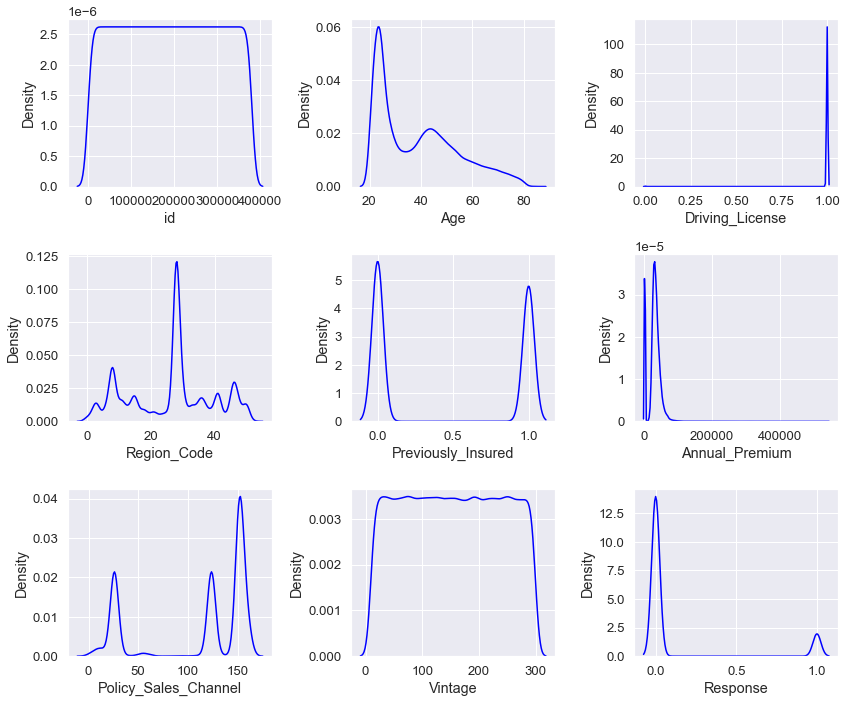

In [21]:
features = numerical
for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (12,10)
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

### b. Boxplot Analysis

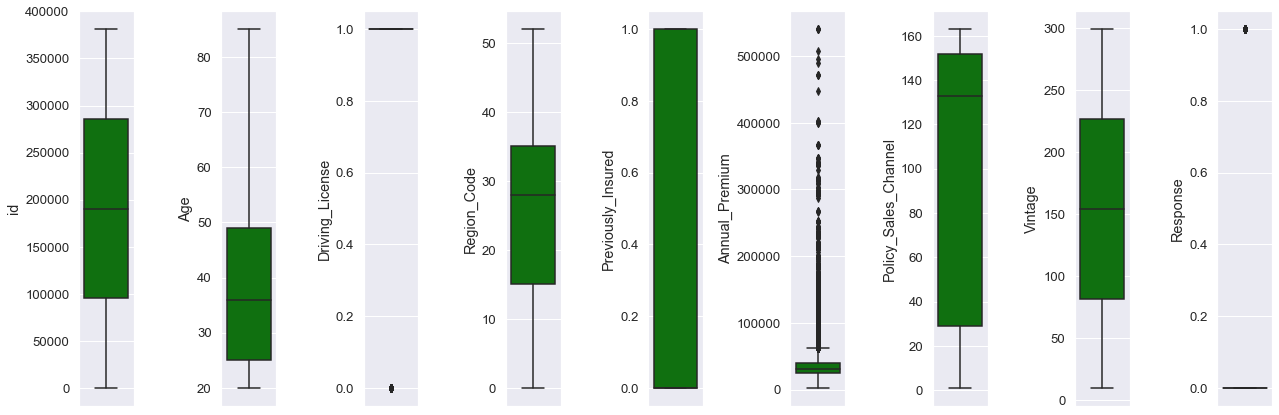

In [22]:
for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (18,6)
    plt.subplot(1,9,i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

**Subplot Analysis:**
Dapat kita lihat dari hasil visualisasi di atas bahwa rata-rata distribusi pada tiap kolom adalah skewed, hanya kolom "Region_Code" yang berdistribusi normal, kolom "Previously_Insured" memiliki bimodal distribusi dikarenakan nilai uniknya hanya 0 atau 1 dan distribusi nya hampir sama rata.

**Boxplot Analysis:**
Pada boxplot chart nilai dengan outlier terbanyak ada pada kolom "Annual_Premium", pada kolom "Response" atau bisa disebut Target memiliki nilai salah satu yang mendominasi.

### c. Countplot Analysis (Caategorical)

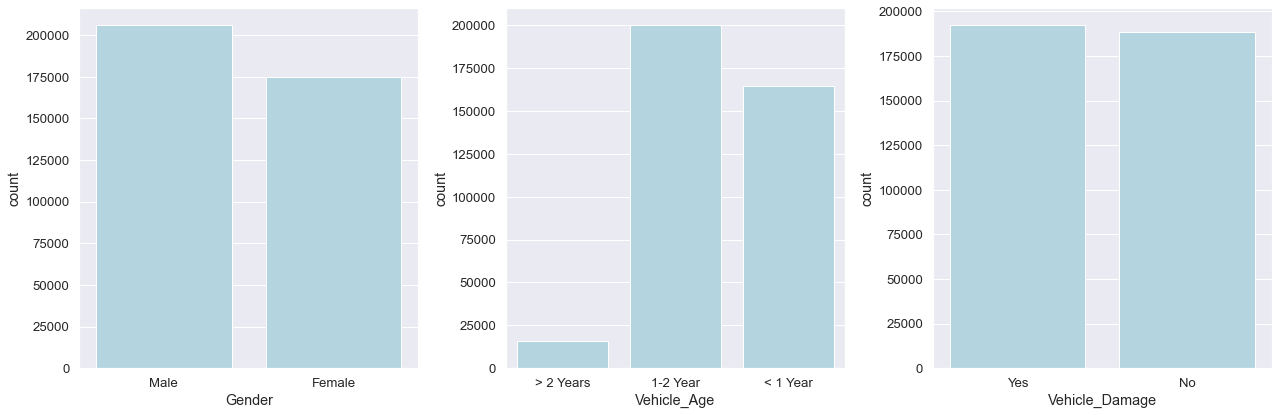

In [23]:
fitur = categorical
for i in range(0, len(fitur)):
    plt.subplot(1, len(fitur), i+1)
    sns.countplot(x=df[fitur[i]], color='lightblue')
    plt.tight_layout()

**Countplot Analysis:** Tidak ada nilai yang terlalu mendominasi pada kolom Gender dan Vehicle_Damage, sedangkan pada kolom Vehicle_Age terdapat dua nilai yang mendominasi.

**Follow Up untuk Pre-Processing**
- Melakukan handling outlier
- Melakukan standarisasi pada kolom-kolom yang jauh dari distribusi normal
- Melakukan feature encoding pada kolom yang berisi categorical
- Melakukan class imbalance pada kolom yang memiliki nilai dominasi seperti pada kolom Response

## 3. Multivariate Analysis

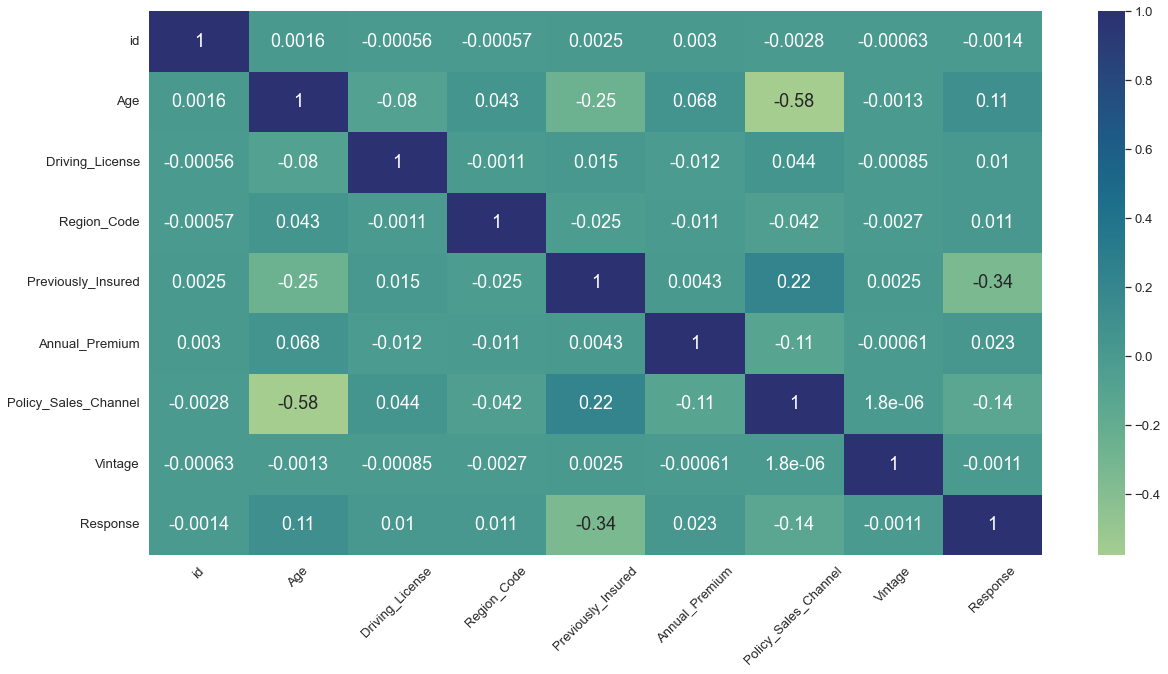

In [26]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(),cmap="crest",annot=True,annot_kws={"size": 18})
plt.xticks(rotation = 45)
plt.show()

- Tidak ada variable yang memiliki korelasi kuat atau r >= 0.7 atau r <= -0.7
- Hanya variable Age dengan Policy_Sales_Channel yang memiliki korelasi yang cukup kuat
- Variabel Response dengan Previously_Insured memiliki korelasi > 0.3 namun cenderung lemah

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='Gender'>

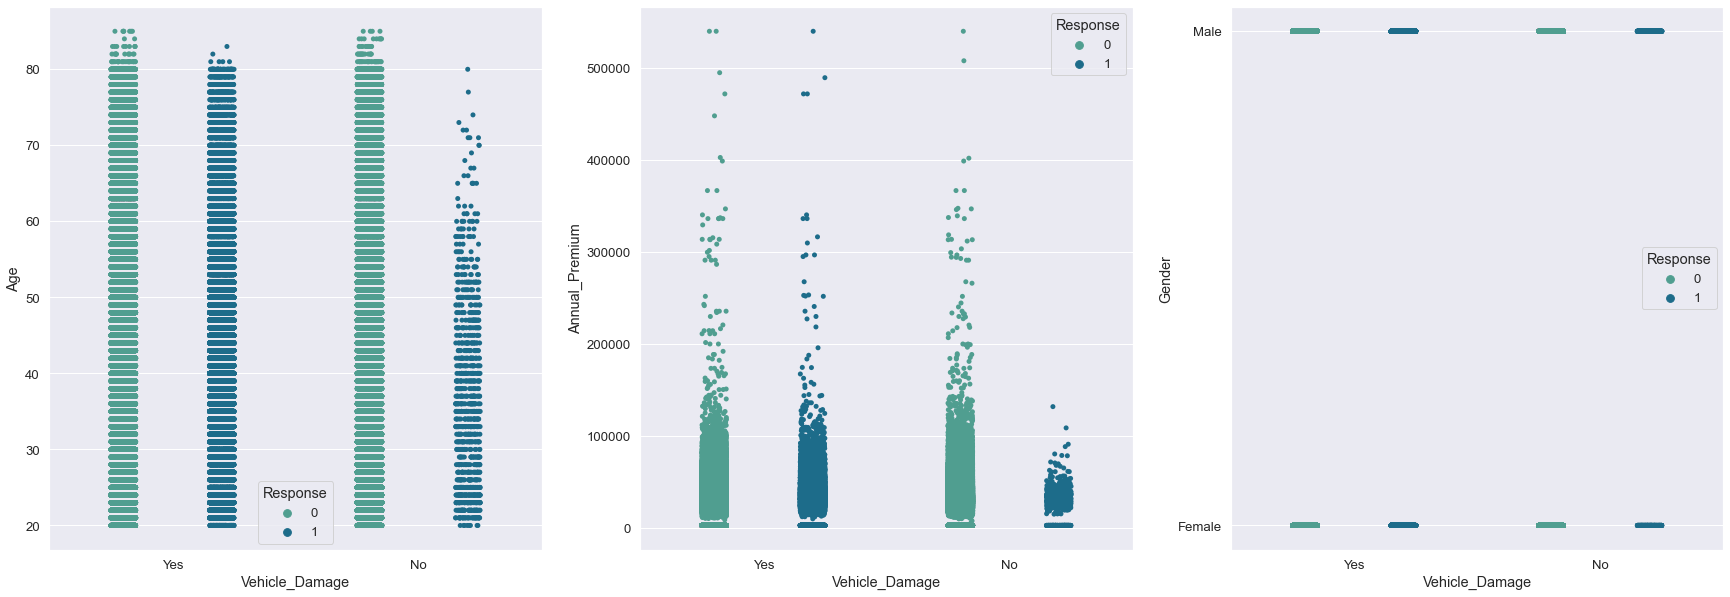

In [27]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
sns.stripplot(data=df, x="Vehicle_Damage", y="Age", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 2)
sns.stripplot(data=df, x="Vehicle_Damage", y="Annual_Premium", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 3)
sns.stripplot(data=df, x="Vehicle_Damage", y="Gender", hue='Response',dodge=True, palette='crest')

<AxesSubplot:xlabel='Gender', ylabel='Annual_Premium'>

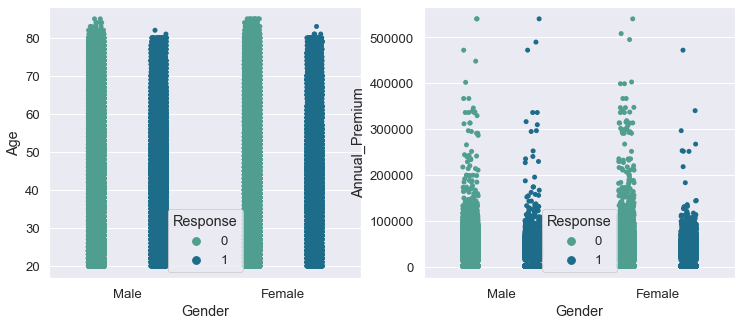

In [28]:
fig = plt.figure(figsize=(19,5))
plt.subplot(1, 3, 1)
sns.stripplot(data=df, x="Gender", y="Age", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 2)
sns.stripplot(data=df, x="Gender", y="Annual_Premium", hue='Response',dodge=True, palette='crest')

<AxesSubplot:xlabel='Vehicle_Age', ylabel='Annual_Premium'>

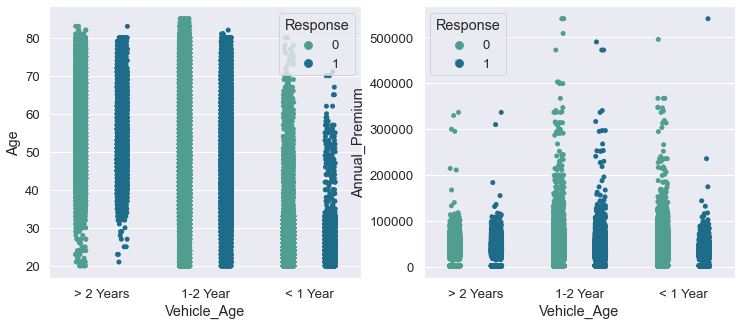

In [29]:
fig = plt.figure(figsize=(19,5))
plt.subplot(1, 3, 1)
sns.stripplot(data=df, x="Vehicle_Age", y="Age", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 2)
sns.stripplot(data=df, x="Vehicle_Age", y="Annual_Premium", hue='Response',dodge=True, palette='crest')